In [1]:

import os, shutil
from glob import glob
import numpy as np
import pandas as pd
from natsort import natsorted
import seaborn as sns
from tqdm import tqdm, trange
import matplotlib.pyplot as plt


In [6]:
in_dir = "out01_tms_induced_respose/"
in_dir2 = "data_subject_info/"

out_dir = "out02_one_sample_ttest_and_boxplot/"
in_file_name = "HRF_tms_induced_response.csv"

if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
complete_df = pd.read_csv(in_dir + in_file_name)
complete_df


,inputfile,subject,site,group,tms_site_response_standard,tms_site_response_individual_6mm,tms_site_response_individual_10mm,tms_site_response_individual_14mm,tms_site_response_individual_14-10mm,tms_site_response_individual_10-6mm
0,/Users/jingjiang/Library/CloudStorage/GoogleDr...,1001,L_Fp,NTHC,0.287125,0.439684,0.456288,0.395807,0.354767,0.462649
1,/Users/jingjiang/Library/CloudStorage/GoogleDr...,1003,L_Fp,NTHC,-1.260076,1.178456,0.916780,0.524276,0.390585,0.894974
2,/Users/jingjiang/Library/CloudStorage/GoogleDr...,1036,L_Fp,NTHC,-1.618781,-1.208849,-1.281960,-1.378883,-1.432572,-1.302709
3,/Users/jingjiang/Library/CloudStorage/GoogleDr...,1037,L_Fp,NTHC,-0.337557,NaN,NaN,NaN,NaN,NaN
4,/Users/jingjiang/Library/CloudStorage/GoogleDr...,1038,L_Fp,NTHC,-0.523261,0.030765,0.065123,-0.066875,-0.118009,0.069139
...,...,...,...,...,...,...,...,...,...,...
793,/Users/jingjiang/Library/CloudStorage/GoogleDr...,2090,R_preSMA,TEHC,0.214189,-0.228209,-0.128205,0.078518,0.208812,-0.092598
794,/Users/jingjiang/Library/CloudStorage/GoogleDr...,2093,R_preSMA,TEHC,0.155220,0.220501,0.183733,0.107853,0.057474,0.168976
795,/Users/jingjiang/Library/CloudStorage/GoogleDr...,2102,R_preSMA,TEHC,-0.534299,-1.183636,-0.868778,-0.557893,-0.361947,-0.756670
796,/Users/jingjiang/Library/CloudStorage/GoogleDr...,2105,R_preSMA,TEHC,-0.217289,-1.108896,-0.575760,-0.114780,0.170221,-0.383482


In [3]:
## boxplot of response (gender by site):

a4_dims = (12, 8)
tms_sites = complete_df['site'].unique()
plot_x_order = ["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"]
colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(tms_sites)).as_hex()
colors = colors[1::2] + colors[2::2] 

def plot_response(ylabel, pvalue, cohend):

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)
    sns.swarmplot(y = ylabel, x = "site", data = complete_df, 
                  #hue = 'gender', 
                  order=plot_x_order,
                  dodge=True, ax = ax, facecolors='none',
                  palette = colors, #plot_kws={'scatter_kws': {'alpha': 0.1}}
                  alpha = .75, size=4)

    sns.boxplot(y = ylabel, x = "site", data = complete_df, #hue = 'gender', 
                order=plot_x_order,
                palette = colors, notch = True, ax = ax)
    
    for i,artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

    # sns.boxplot(data=df,x="site",y="tms_site_response",dodge=True,showfliers=False,
                # showbox=True,linewidth=0.8,color = "w");
        
    # add annotations:
    locs, _ = plt.xticks()
    y = 3
    for i, x in enumerate(locs):
        ax.text(x-.3, y, "${p}$=" + pvalue[i], ha='left', va='bottom', color='k', size = 10)
        ax.text(x-.3, y+.25, "${d}$=" + cohend[i], ha='left', va='bottom', color='k', size = 10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(tms_sites)])
    ax.set_ylabel("Mean TMS Site Response")
    ax.set_xlabel("TMS Site");

    # Add horizontal red lines indicating mean of violinplot
#     spread = 0.1
#     for i, label in enumerate(ax.get_xticklabels()):
#         tms = label.get_text()
#         mean = np.nanmean(complete_df[complete_df['site']==str(tms)]['tms_site_response_standard'])
#         ax.hlines(mean, i-spread, i+spread, colors='red')
    ax.hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')
    
    return fig

In [3]:
## boxplot with violin plot of response (gender by site):

a4_dims = (12, 8)
tms_sites = complete_df['site'].unique()
plot_x_order = ["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"]
colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(tms_sites)).as_hex()
colors = colors[1::2] + colors[2::2] 

def plot_response(ylabel, pvalue, cohend):

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)
    
    ax = sns.violinplot(x="species", y="sepal_length", data=iris, hue="species", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))


    sns.swarmplot(y = ylabel, x = "site", data = complete_df, 
                  #hue = 'gender', 
                  order=plot_x_order,
                  dodge=True, ax = ax, facecolors='none',
                  palette = colors, #plot_kws={'scatter_kws': {'alpha': 0.1}}
                  alpha = .75, size=4)

    sns.boxplot(y = ylabel, x = "site", data = complete_df, #hue = 'gender', 
                order=plot_x_order,
                palette = colors, notch = True, ax = ax)
    
    for i,artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

    # sns.boxplot(data=df,x="site",y="tms_site_response",dodge=True,showfliers=False,
                # showbox=True,linewidth=0.8,color = "w");
        
    # add annotations:
    locs, _ = plt.xticks()
    y = 3
    for i, x in enumerate(locs):
        ax.text(x-.3, y, "${p}$=" + pvalue[i], ha='left', va='bottom', color='k', size = 10)
        ax.text(x-.3, y+.25, "${d}$=" + cohend[i], ha='left', va='bottom', color='k', size = 10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(tms_sites)])
    ax.set_ylabel("Mean TMS Site Response")
    ax.set_xlabel("TMS Site");

    # Add horizontal red lines indicating mean of violinplot
#     spread = 0.1
#     for i, label in enumerate(ax.get_xticklabels()):
#         tms = label.get_text()
#         mean = np.nanmean(complete_df[complete_df['site']==str(tms)]['tms_site_response_standard'])
#         ax.hlines(mean, i-spread, i+spread, colors='red')
    ax.hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')
    
    return fig

In [ ]:
## run 1 sample t-test for each roi:
pd.options.mode.chained_assignment = None # avoid the warnning message for assigning values to slices of df.
from scipy.stats import ttest_1samp

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
        
    return report2

test_variables = ['tms_site_response_standard', 'tms_site_response_individual_6mm',
                  'tms_site_response_individual_10mm', 'tms_site_response_individual_14mm', 
                  'tms_site_response_individual_14-10mm', 'tms_site_response_individual_10-6mm']

row_index = pd.MultiIndex.from_tuples([(i , j) for i in test_variables for j in ['t value', 'p value', "Cohen's d"]])
result = pd.DataFrame(index = row_index, columns = plot_x_order)

# statistical tests for each roi and roi setting:
for var in test_variables:
    for tms in plot_x_order:
        value = complete_df.loc[(complete_df['site']==tms) & (~complete_df[var].isna()), var]
        # add () & () to multiple conditions.
        t, p = ttest_1samp(value, popmean=0)
        cohend = value.mean() / value.std()
        
        result.loc[(var, 't value'), tms] = t
        result.loc[(var, 'p value'), tms] = p
        result.loc[(var, "Cohen's d"), tms] = cohend

result = format_table(result)
# save results separately for each roi setting:
for var in test_variables:
    result.loc[(var, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_dir + 'response_' + var + '.csv')

result

tms_site_response_standard


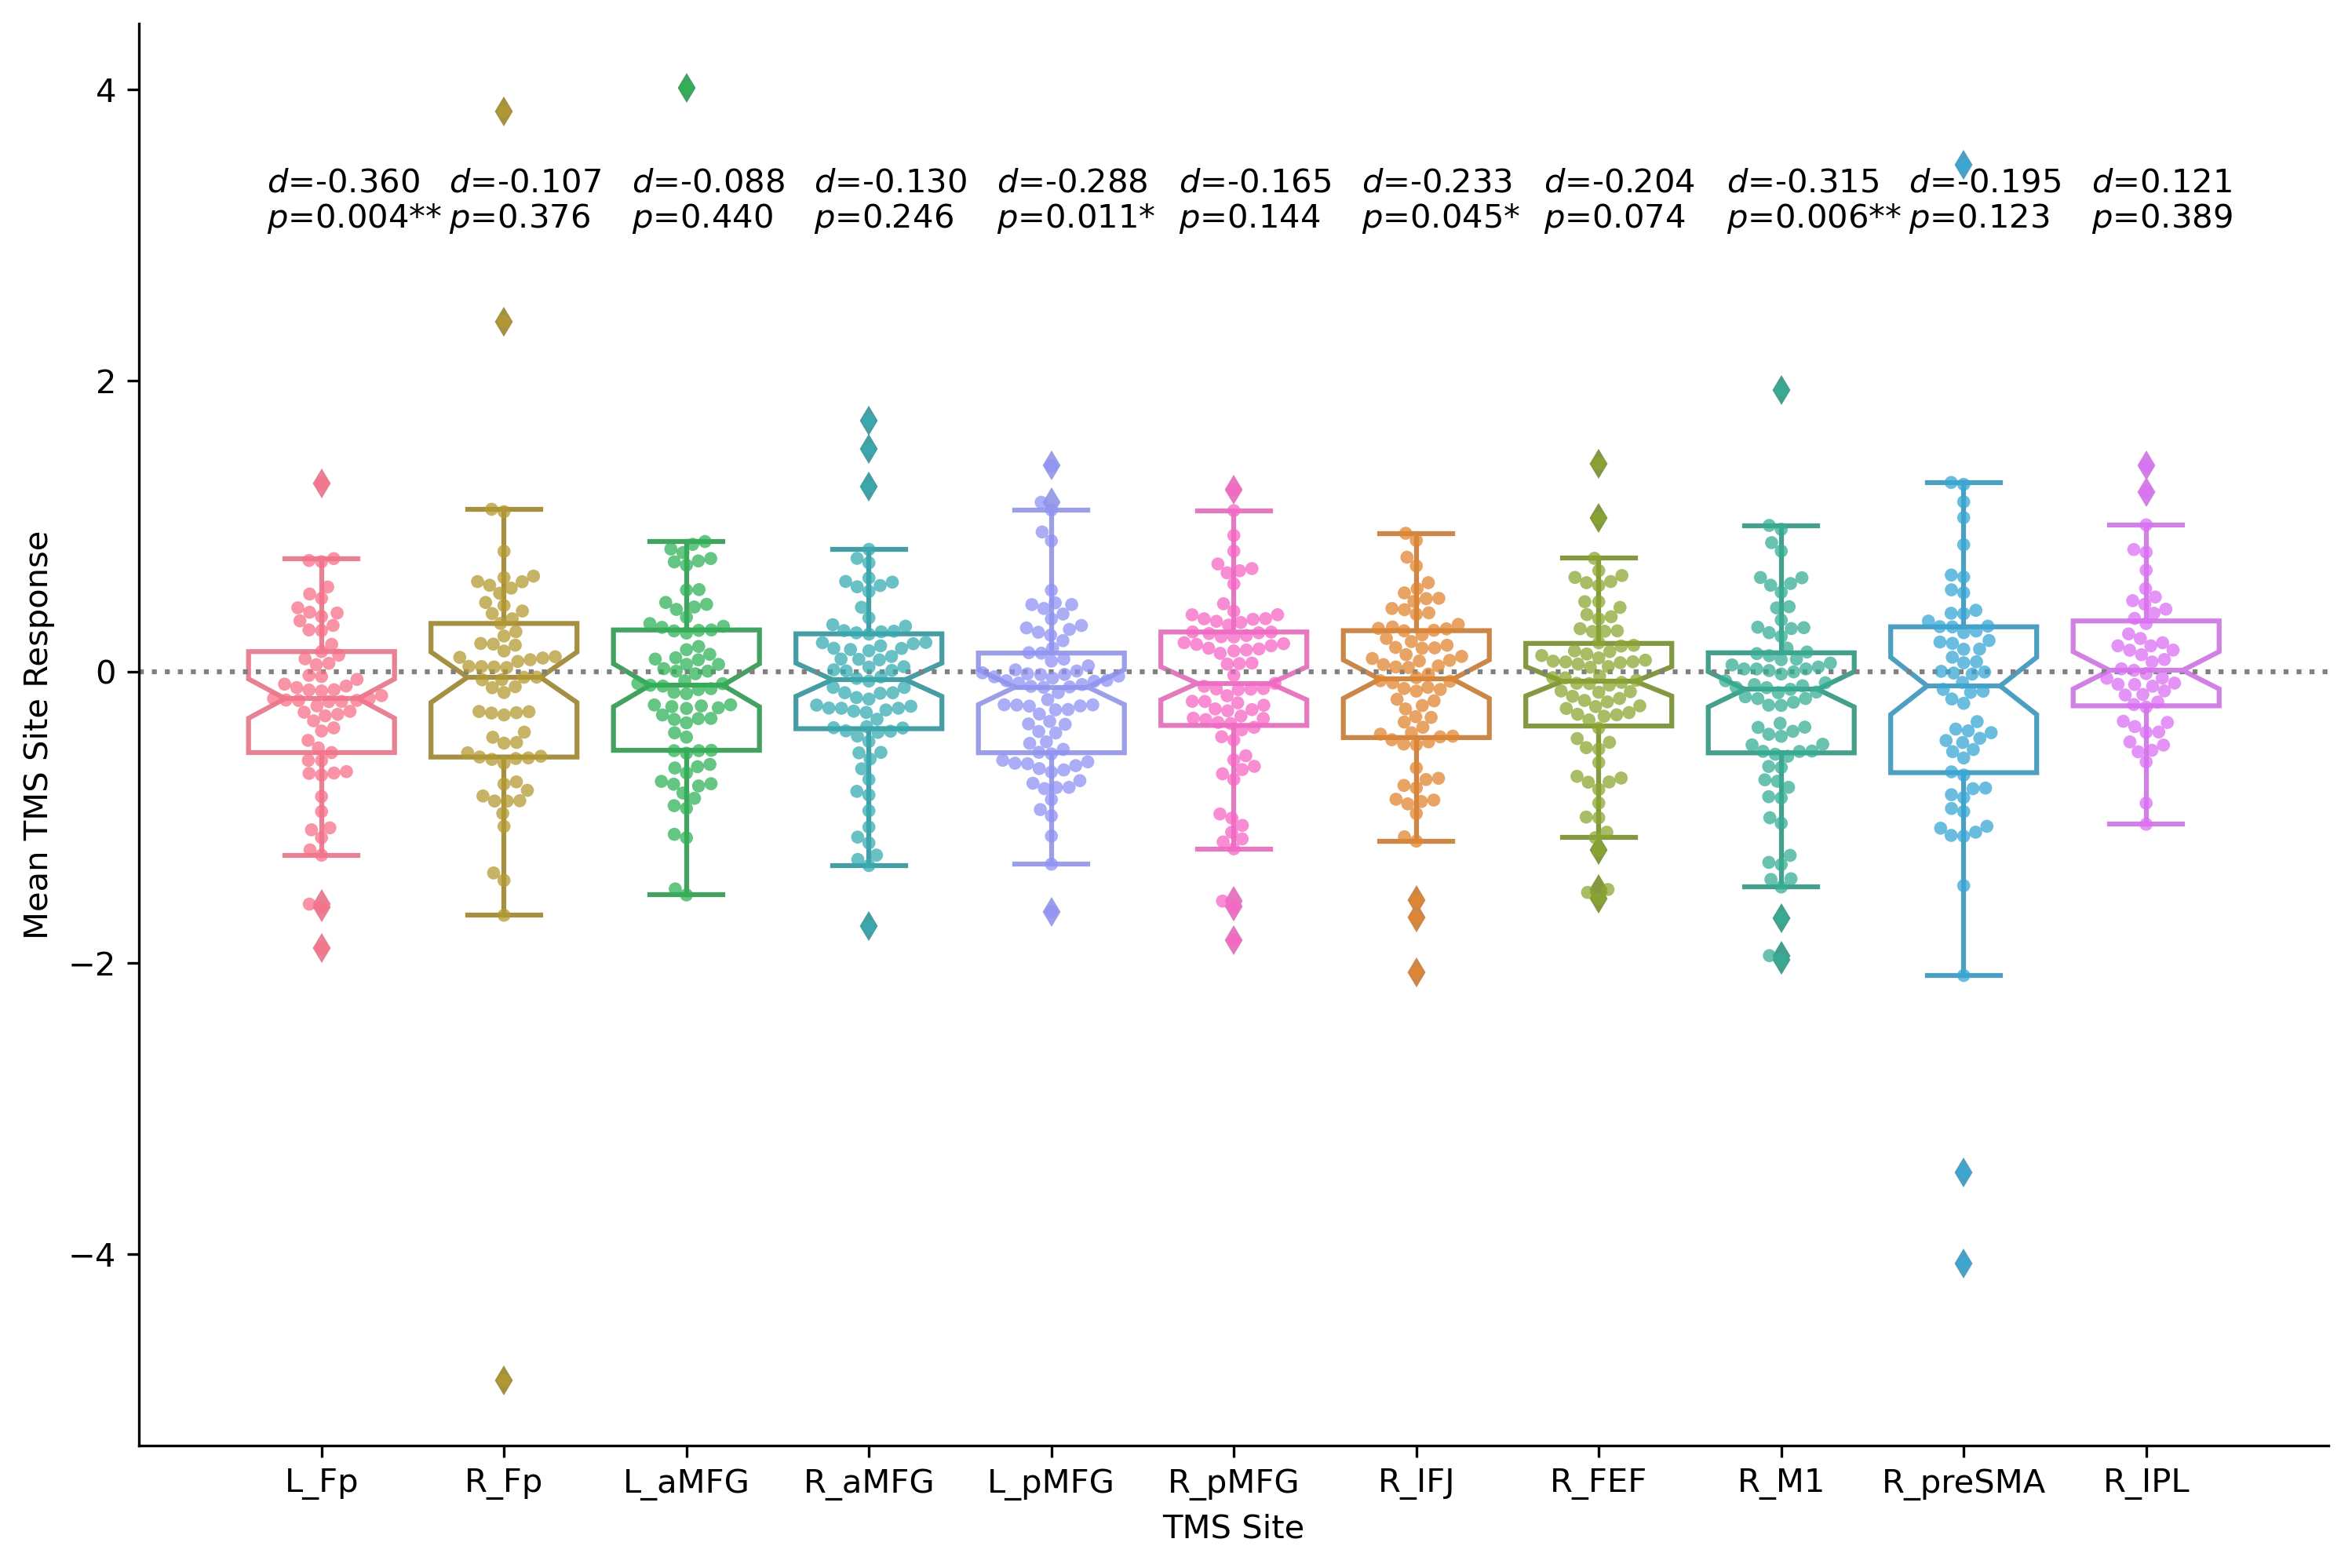

tms_site_response_individual_6mm


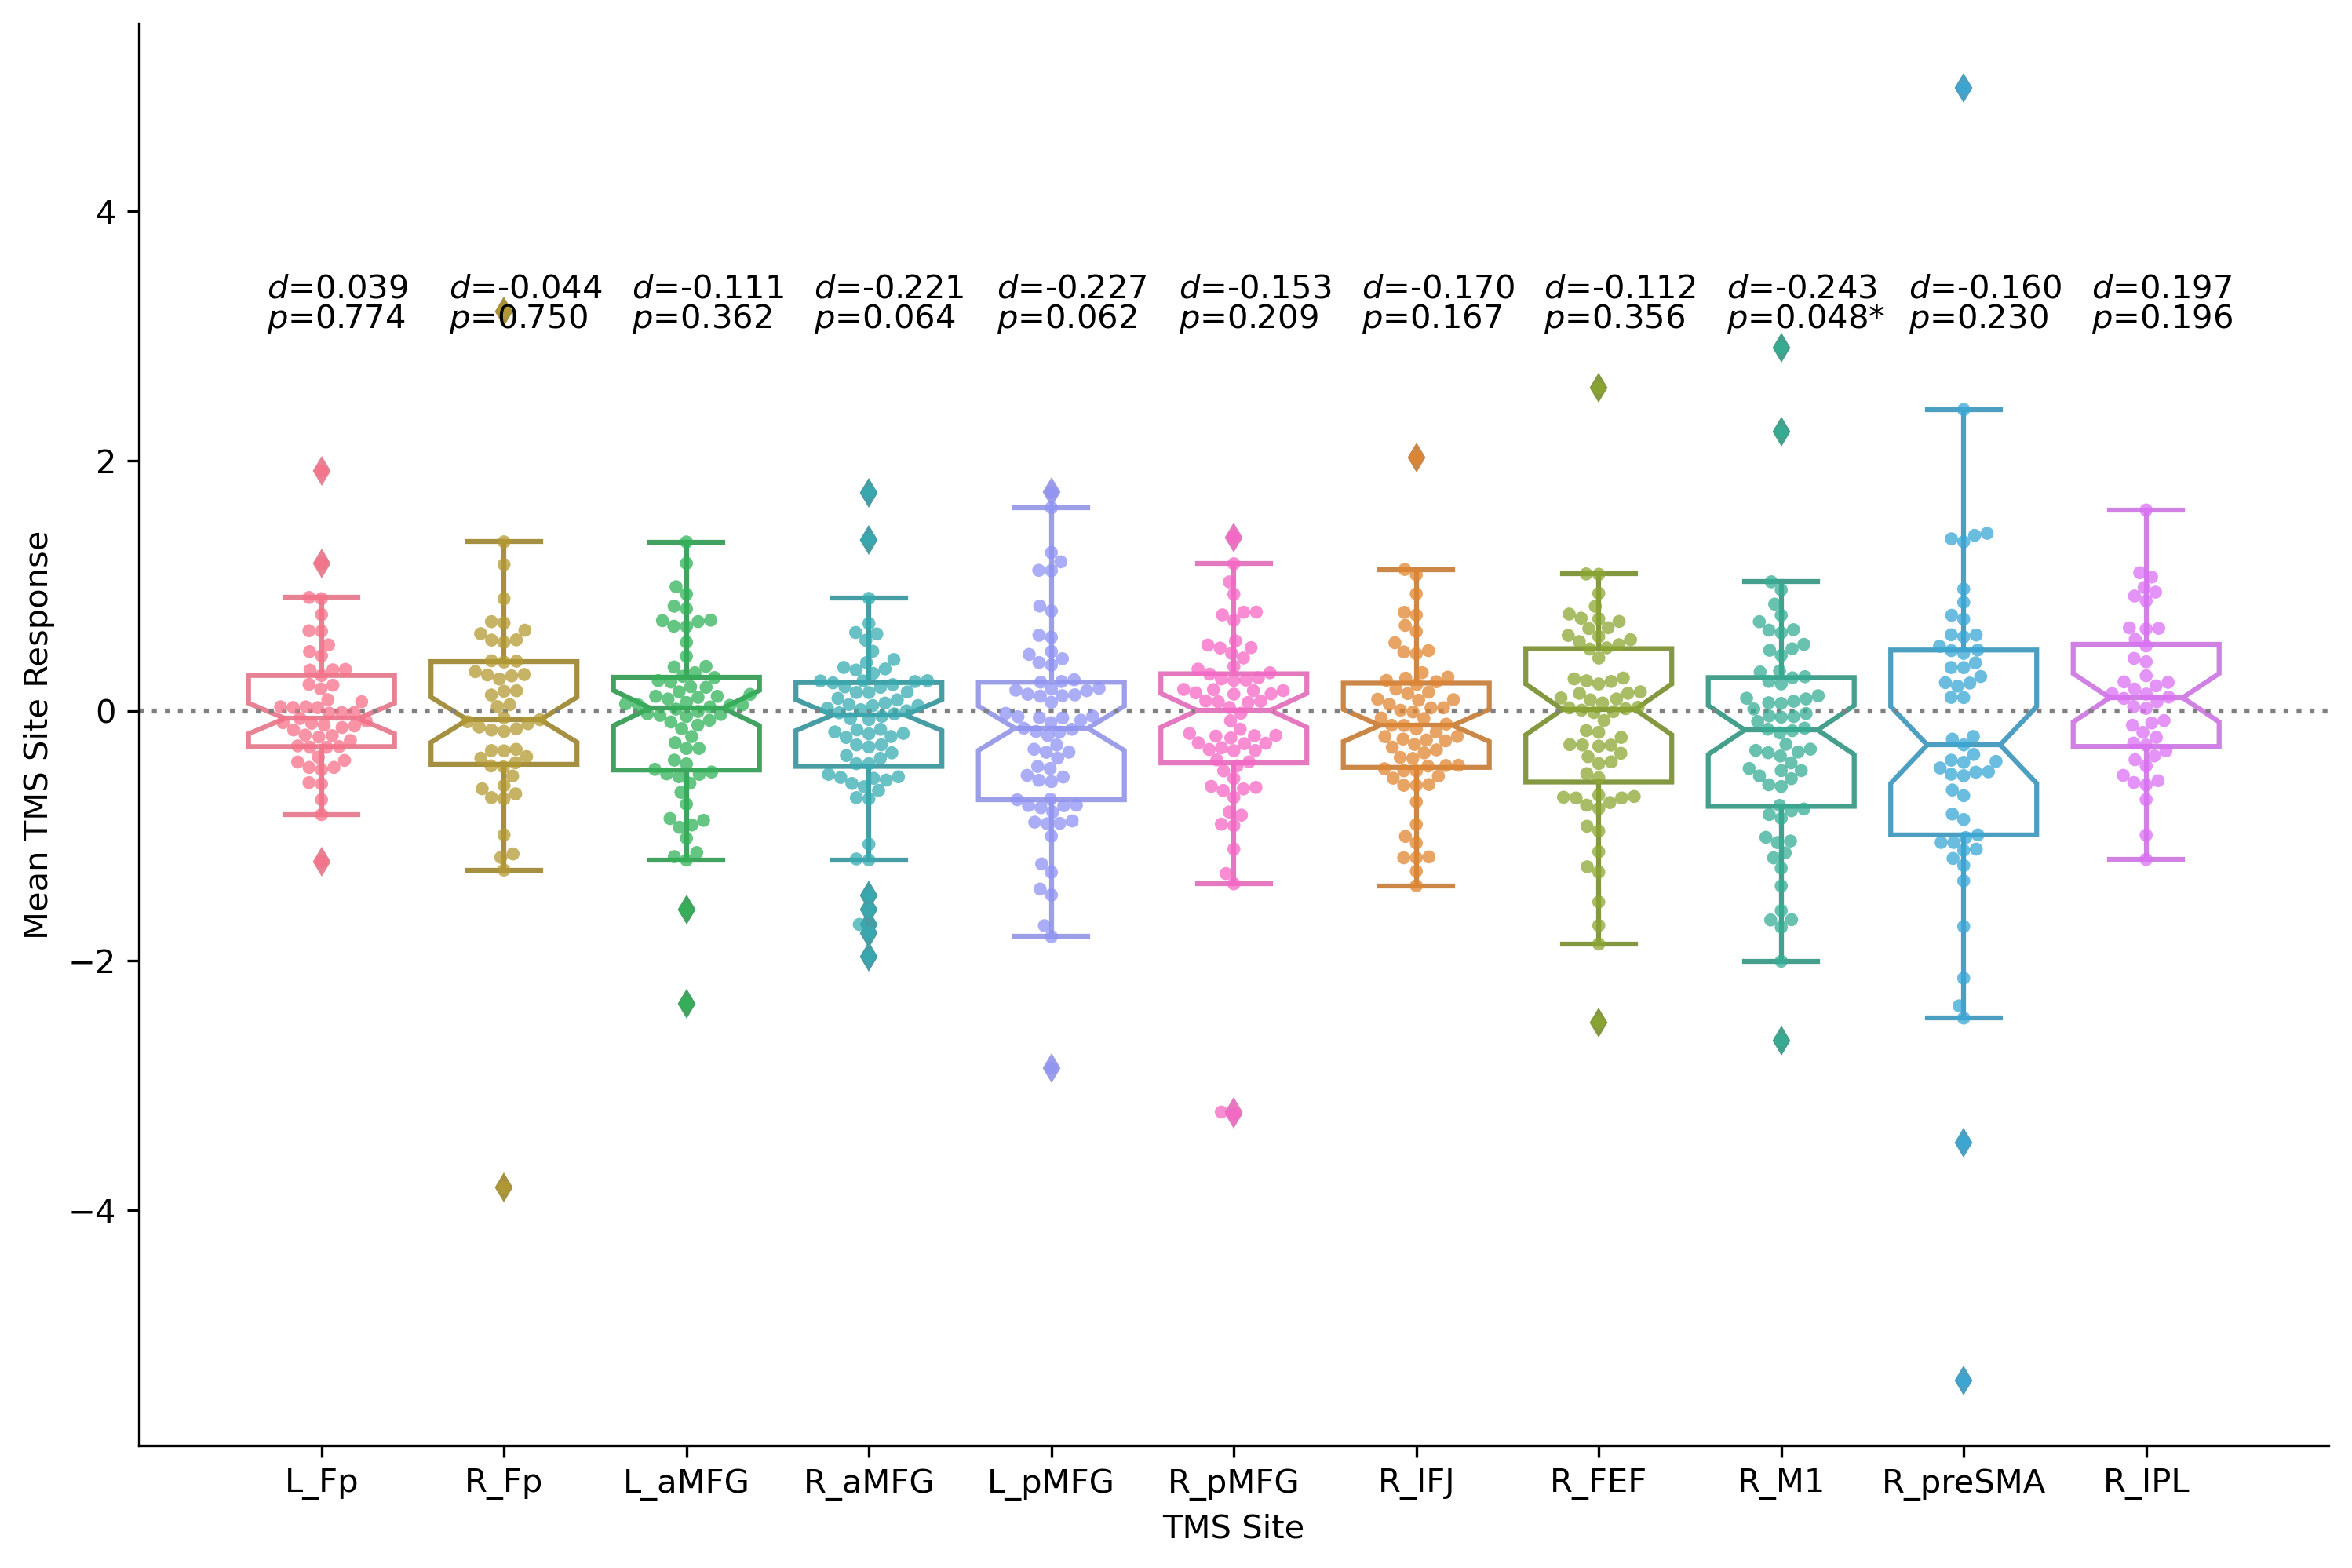

tms_site_response_individual_10mm


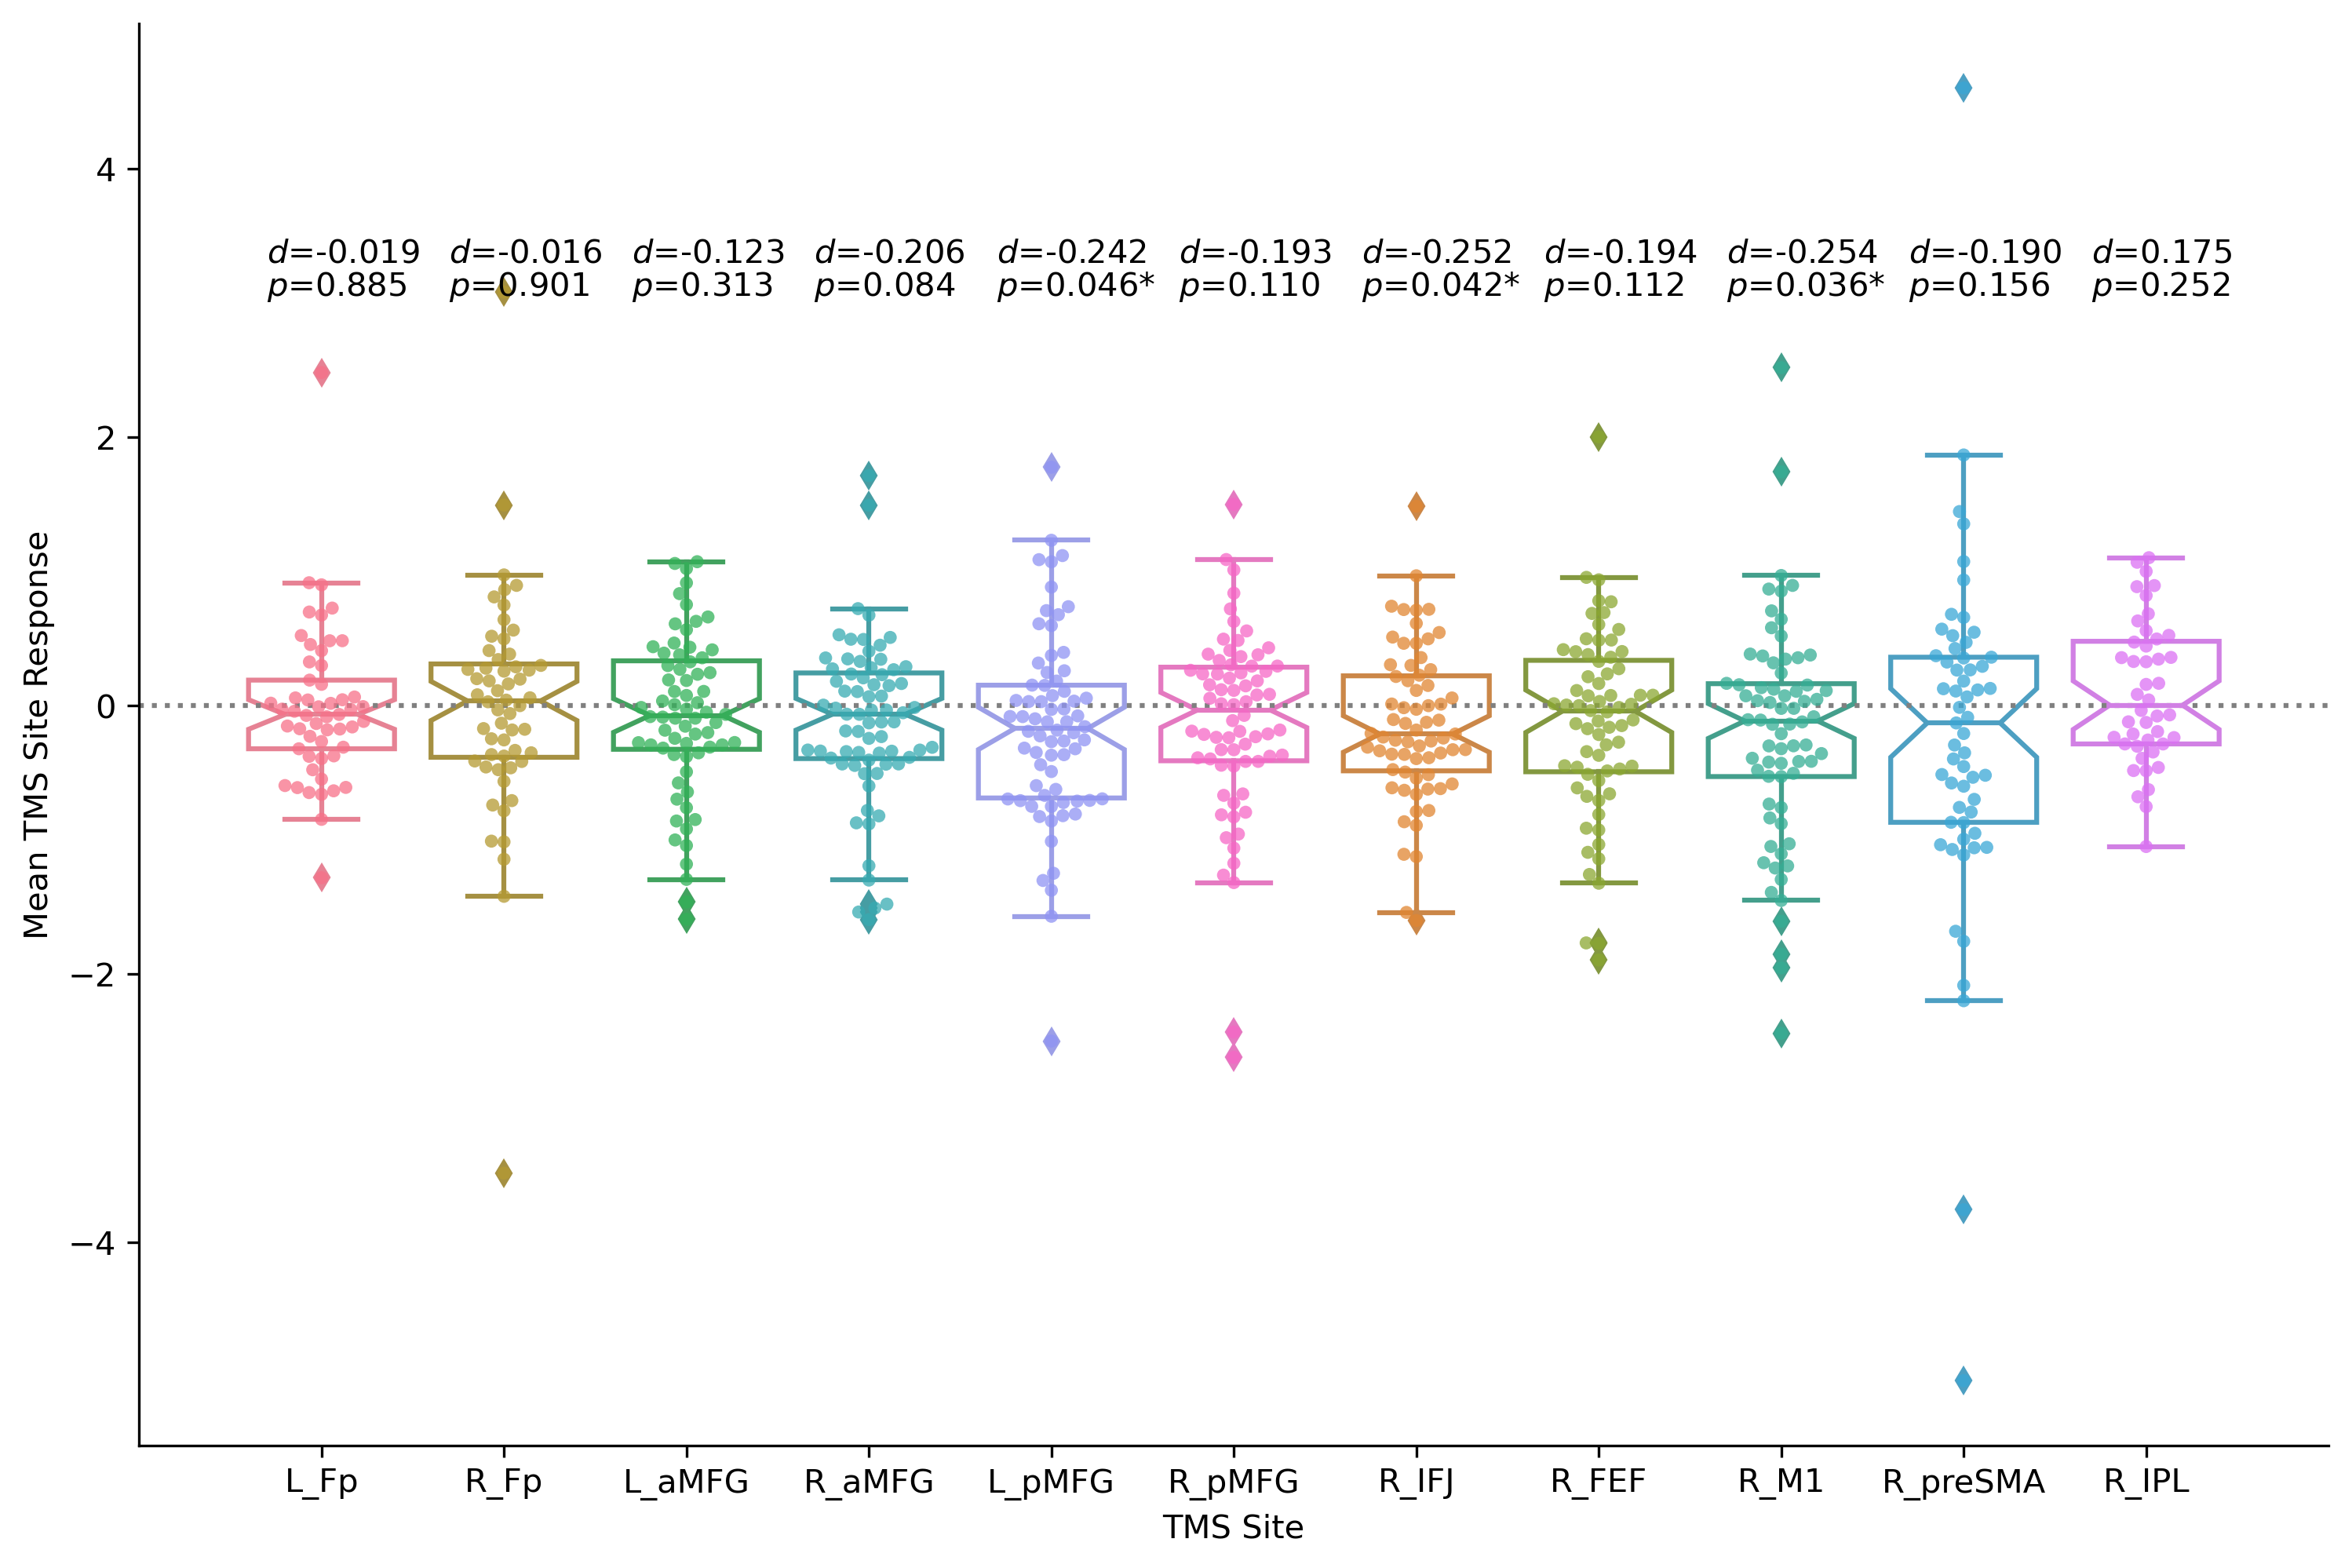

tms_site_response_individual_14mm


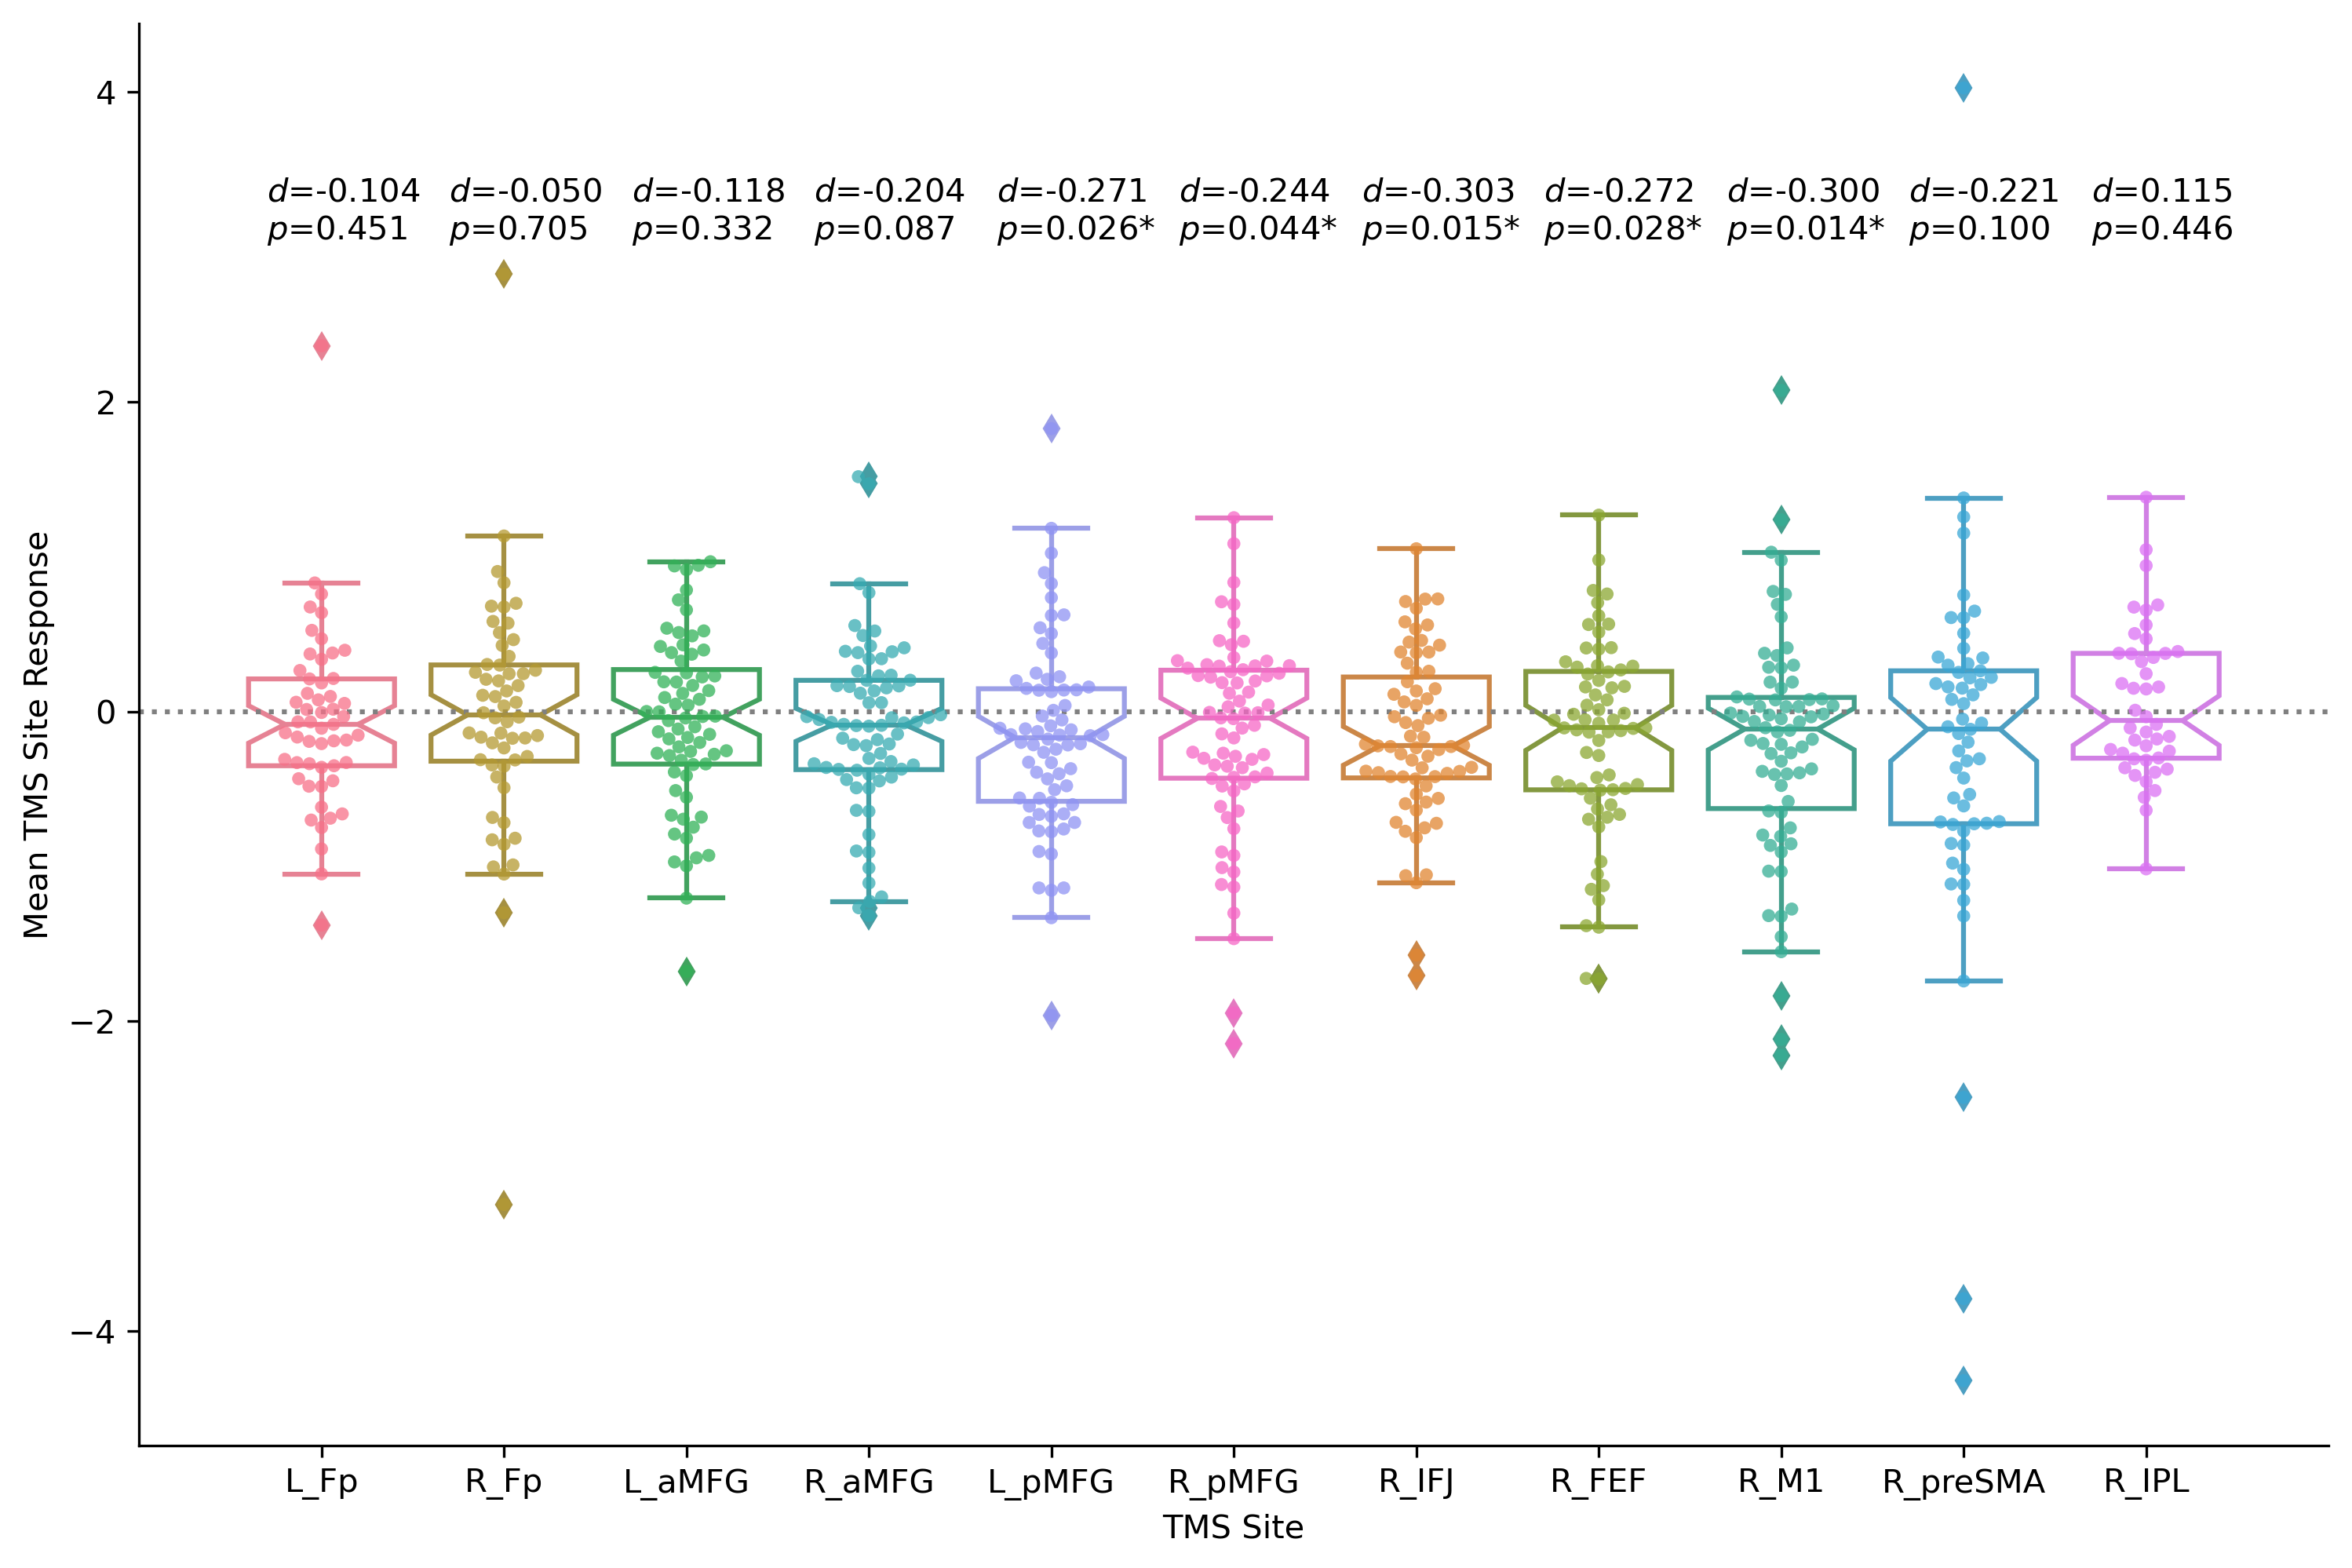

tms_site_response_individual_14-10mm


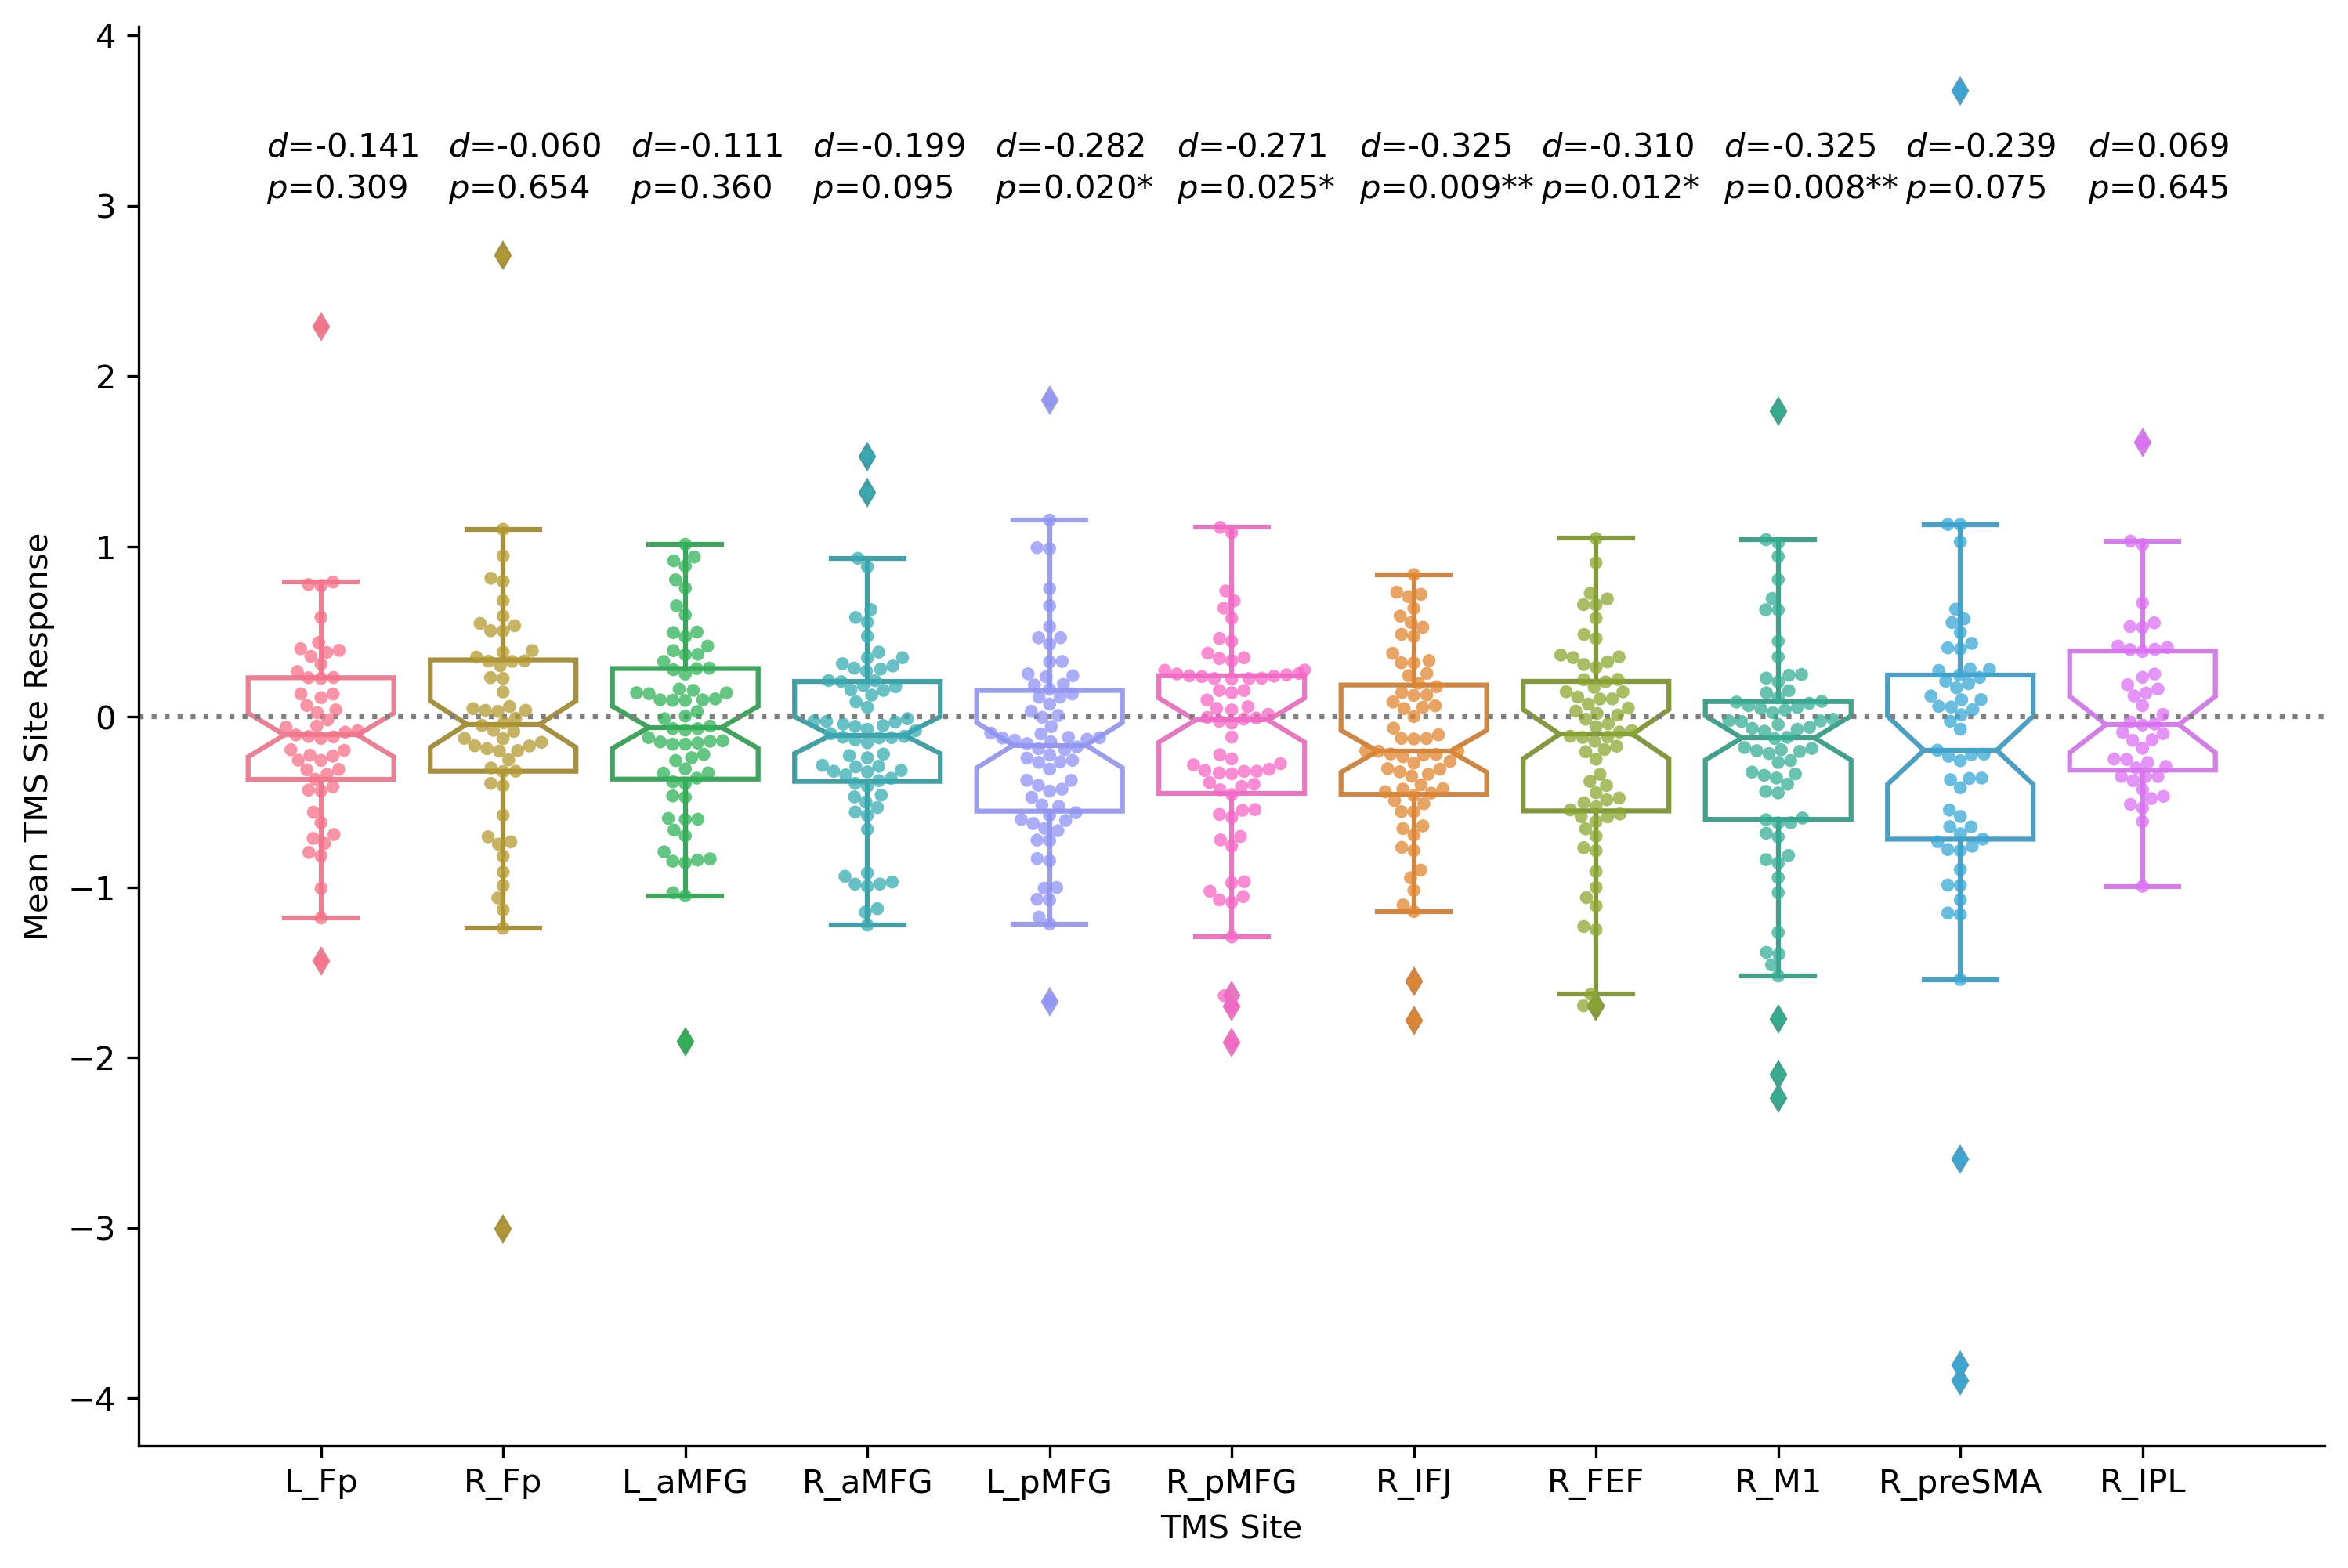

tms_site_response_individual_10-6mm


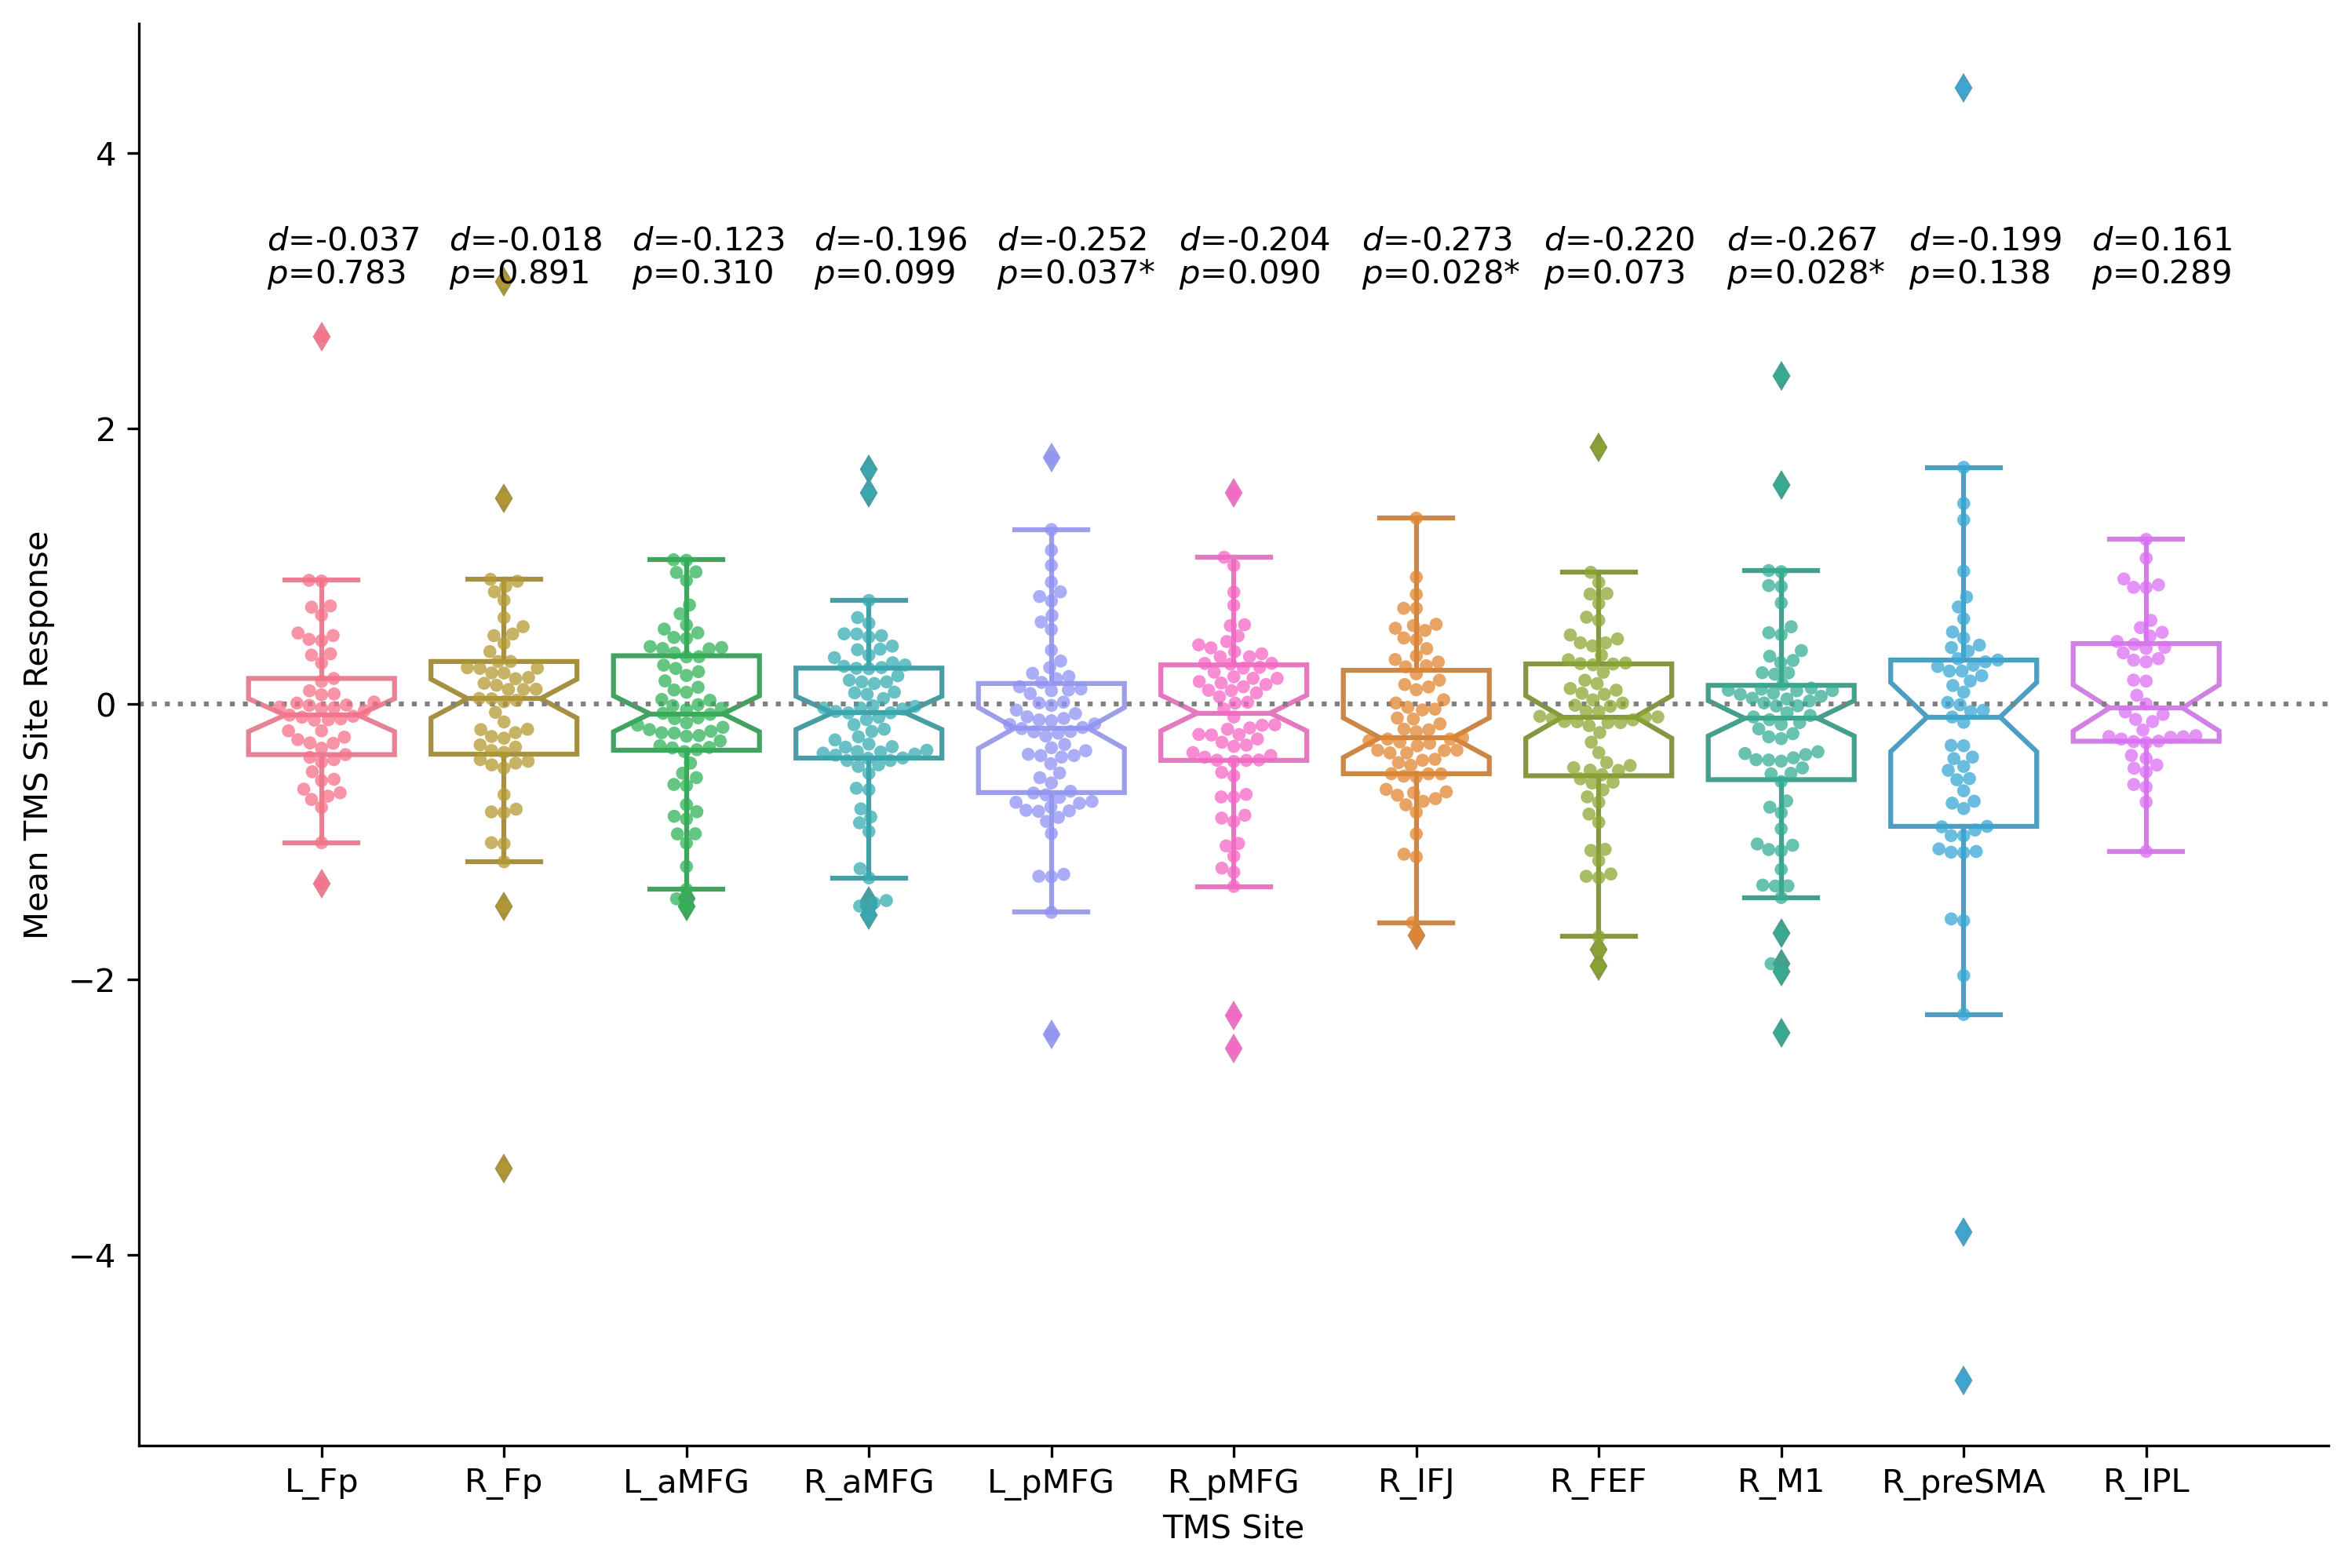

In [23]:
test_variables = ['tms_site_response_standard', 'tms_site_response_individual_6mm',
                  'tms_site_response_individual_10mm', 'tms_site_response_individual_14mm', 
                  'tms_site_response_individual_14-10mm', 'tms_site_response_individual_10-6mm']

for var in test_variables:
    print(var)
    fig = plot_response(var, result.loc[(var, 'p value'),:], result.loc[(var, "Cohen's d"),:])
    plt.show()
    fig.savefig(out_dir+'/figure1_box_plot_tms_response' + var + '.png', 
                dpi=600, bbox_inches = 'tight', pad_inches = 0.1)
    